In [1]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.3 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0r

In [2]:
import tensorflow as tf

tf.random.set_seed(42)


## Load data


In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Explore data


In [4]:
train_images.shape, test_images.shape


((60000, 28, 28), (10000, 28, 28))

In [5]:
len(train_labels), len(test_labels)


(60000, 10000)

In [6]:
train_labels, test_labels


(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

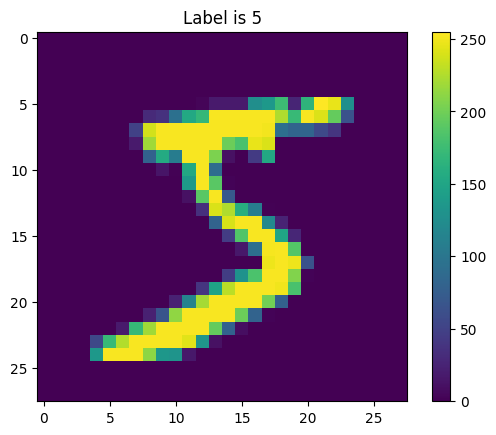

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])  # , cmap='gray'
plt.colorbar()
plt.title("Label is {label}".format(label=train_labels[0]))
plt.show()


## Data Preparation: scaling


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [9]:
%matplotlib inline


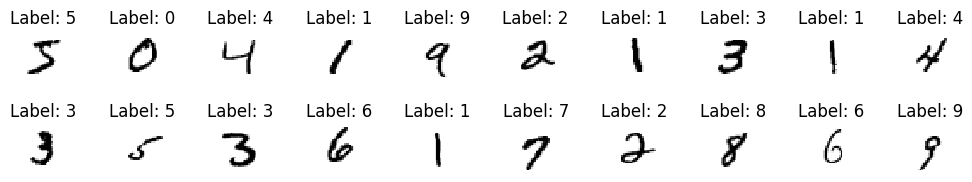

In [10]:
import matplotlib
import matplotlib.pyplot as plt

# plot first 20 images
n = 20
_, axes = plt.subplots(2, 10, figsize=(10, 2))
plt.tight_layout()
for i in range(n):
    row, col = i // 10, i % 10
    axes[row, col].set_axis_off()
    axes[row, col].imshow(
        train_images[
            i,
        ],
        cmap=plt.cm.binary,
        interpolation="nearest",
    )  # plt.cm.gray_r
    axes[row, col].set_title("Label: %i" % train_labels[i])


## Build MLP


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

mlp_model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=train_images.shape[1:]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
mlp_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
mlp_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
mlp_model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8603 - loss: 0.5036
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9575 - loss: 0.1504
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9712 - loss: 0.1010
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9791 - loss: 0.0743
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9841 - loss: 0.0569


In [14]:
test_loss, test_acc = mlp_model.evaluate(test_images, test_labels, verbose=0)
test_acc


0.9779999852180481

## Build CNN


In [15]:

def build_cnn():
    model = keras.Sequential(
        [
            keras.layers.Conv2D(
                32, (3, 3), activation="relu", input_shape=train_images.shape[1:] + (1,)
            ),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation="relu"),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(10, activation="softmax"),
        ]
    )

    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
    )
    return model



In [16]:
cnn_model = build_cnn()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
train_images_4d = train_images[..., tf.newaxis]
test_images_4d = test_images[..., tf.newaxis]
train_images_4d.shape, test_images_4d.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
cnn_model.fit(train_images_4d, train_labels, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8785 - loss: 0.4137
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9819 - loss: 0.0588
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9878 - loss: 0.0394
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9902 - loss: 0.0303
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9927 - loss: 0.0226


In [20]:
test_loss, test_acc = cnn_model.evaluate(test_images_4d, test_labels, verbose=0)
test_acc


0.9850000143051147

## Make predictions


In [21]:
test_predictions = cnn_model.predict(test_images_4d)
test_predictions[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


array([[4.92533583e-11, 1.97050554e-09, 1.76835311e-08, 3.57811274e-07,
        5.91033255e-12, 1.89947502e-09, 1.27541478e-13, 9.99999583e-01,
        8.22818258e-10, 1.22614918e-10],
       [1.70275338e-09, 1.42010251e-07, 9.99999821e-01, 2.75829977e-14,
        4.55847044e-14, 1.09947031e-13, 4.62626026e-09, 8.58245549e-13,
        4.97569447e-14, 1.45532817e-17],
       [4.59116382e-06, 9.99195516e-01, 1.56025671e-05, 3.76564806e-08,
        1.75131681e-05, 5.95949059e-05, 1.64136727e-05, 6.81519101e-04,
        8.87882288e-06, 3.80056633e-07],
       [9.99922812e-01, 1.35265768e-12, 7.21360263e-11, 8.00455813e-10,
        4.36653658e-10, 3.80634992e-06, 7.28941959e-05, 2.36190331e-07,
        2.74993788e-08, 7.14299375e-08],
       [2.92985053e-10, 9.11166431e-09, 3.79660481e-09, 4.86229612e-10,
        9.99873638e-01, 9.39695521e-09, 1.45733647e-09, 1.06222465e-07,
        1.41784957e-08, 1.26220475e-04]], dtype=float32)

In [22]:
import numpy as np

np.argmax(test_predictions[0])


7

In [23]:
test_labels[0]


7